In [22]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

<a name="2"></a>
## 1 - Logistic Regression

In this part, I will build a logistic regression model to predict whether a student will pass the final exam based on the result of previous 2 tests.

<a name="2.1"></a>
### 1.1 Problem Statement

A teacher wants to determine each students’s chance of passing the final exam based on the results of their 2 previous tests. 
* You have historical data from previous applicants that you can use as a training set for logistic regression. 
* For each training example, you have the applicant’s scores on two exams and the admissions decision. 
* Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. 

<a name="2.2"></a>
### 1.2 Loading and visualizing the data

You will start by loading the dataset for this task. 
  - `X_train` contains test scores on two tests for a student.
  - `y_train` is the prediction.
      - `y_train = 1` if the student passes the final exam.
      - `y_train = 0` if the student fails the final exam.
  - Both `X_train` and `y_train` are numpy arrays.


In [23]:
# Load Dataset
X_train = np.array([[35,100],[34,90],[35,79],[34,76],[38,72],[35,60],[30,45],[30,50],[32,44],[33,45],[36,47],[40,65],[41,77],[42,71],[43,79],[44,68],[45,58],[49,52],[50,50],[51,49],[51,46],[52,47],[50,60],[52,60],[51,62],[54,51],[55,35],[56,40],[61,45],[62,51],[63,52],[65,42],[67,45],[75,30],[75,45],[82,42],[82,43],[93,41],[95,40],[50,75],[83,51],[79,50],[89,57],[71,55],[71,68],[74,67],[79,60],[73,66],[77,64],[73,51],[95,94],[90,85],[84,72],[75,67],[74,85],[92,49],[65,86],[67,72],[51,89],[55,82],[56,81],[57,70],[72,100],[68,100],[77,93],[72,95],[91,93],[73,75],[70,90],[85,65],[82,60],[72,91],[77,80],[65,64],[89,94],[81,95],[86,92],[63,79],[71,82],[90,89],[64,75],[68,60],[65,63],[63,99],[94,63],[99,63],[99,81],[68,88],[84,77],[77,84],[100,87],[72,66],[83,92],[81,79],[90,91],[90,68],[60,71],[69,77],[87,85],[76,89]])
y_train = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

In [24]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[ 35 100]
 [ 34  90]
 [ 35  79]
 [ 34  76]
 [ 38  72]]
Type of X_train: <class 'numpy.ndarray'>


In [25]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [0 0 0 0 0]
Type of y_train: <class 'numpy.ndarray'>


#### Dimensions of the variables

A useful way to get familiar with your data is to view its dimensions. Let's print the shape of `X_train` and `y_train` and see how many training examples we have in our dataset.

In [26]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


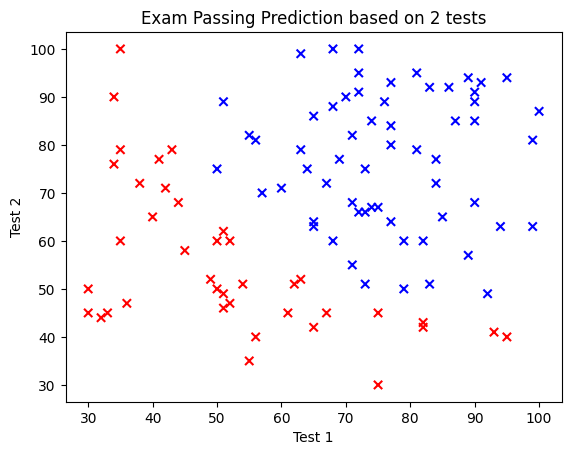

In [27]:
# Assuming your training data is stored in variables X_train and y_train
x1 = X_train[:, 0]  # First feature (Test 1)
x2 = X_train[:, 1]  # Second feature (Test 2)
labels = y_train

# Define colors for each label
colors = {0: 'Red', 1: 'Blue'}

# Plot the data points with colors based on the labels
plt.scatter(x1, x2, c=[colors[label] for label in labels], marker="x")

# Add axis labels and a title
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title('Exam Passing Prediction based on 2 tests')

# Show the plot
plt.show()



The goal is to build a logistic regression model to fit this data.
- With this model, we can then predict if a student will pass their final exam based on their scores on the two tests.

<a name="2.3"></a>
### 1.3  Sigmoid function

Recall that for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used later.

<a name='ex-01'></a>
### Exercise 1


$$g(z) = \frac{1}{1+e^{-z}}$$

Note that 
- `z` is not always a single number, but can also be an array of numbers. 
- If the input is an array of numbers, we'd like to apply the sigmoid function to each value in the input array.

In [28]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    ez= np.exp(-z)
    g = 1/(1+ ez)
        
    return g

Testing a few values by calling `sigmoid(x)` in the cell below. 
- For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. 
- Evaluating `sigmoid(0)` should give exactly 0.5. 


In [29]:
# Note: You can edit this value
value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


<a name="2.4"></a>
### 1.4 Cost function for logistic regression

In this section, I will implement the cost function for logistic regression.

<a name='ex-02'></a>
### Exercise 2

Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
    * It might be helpful to first calculate an intermediate variable $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ where $n$ is the number of features, before calculating $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$

Note:
* Keep in mind that the variables `X_train` and `y_train` are not scalar values but matrices of shape ($m, n$) and ($𝑚$,1) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.
* we will use the sigmoid function that was implemented above.

In [30]:
def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns:
      total_cost : (scalar) cost 
    """

    m, n = X.shape
    eps = 1e-9  #important to add, because otherwise if the denomenator becomes zero in the sigmoid function, it will cause an error.
        
    loss = 0.0
    for i in range(m):
        z = np.dot(X[i],w) + b 
        loss += ((-y[i] * np.log(sigmoid(z) +eps)) - (1-y[i])*np.log(1-sigmoid(z) +eps))
        
    total_cost = loss/m
    
    return total_cost

Testing the `compute_cost` function with two different initializations of the parameters $w$ and $b$ below

In [31]:
m, n = X_train.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [32]:
# Compute and display cost with non-zero w and b
test_w = np.array([0.5, 0.5])
test_b = -63.2
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))

Cost at test w and b (non-zeros): 0.188


<a name="2.5"></a>
### 1.5 Gradient for logistic regression

In this section, we will implement the gradient for logistic regression.

Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously


<a name='ex-03'></a>
### Exercise 3

The `compute_gradient` function to compute $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.

In [33]:
def compute_gradient(X, y, w, b, *argv): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    
    inner_sum_db = 0
    inner_sum_dw = 0
    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb = sigmoid(z)
        
        inner_sum_db += (f_wb - y[i])
        inner_sum_dw += (f_wb - y[i]) * X[i]
        
        
    dj_db = inner_sum_db/m
    dj_dw = inner_sum_dw/m
        
    return dj_db, dj_dw

Testing the implementation of the `compute_gradient` function with two different initializations of the parameters $w$ and $b$

In [34]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.11
dj_dw at initial w and b (zeros):[-13.175, -12.685]


In [35]:
# Compute and display cost and gradient with non-zero w and b
test_w = np.array([ 1, 1])
test_b = 2
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test w={test_w} and b={test_b}:', dj_db)
print('dj_dw at test w={test_w} and b={test_b}:', dj_dw.tolist())

dj_db at test w={test_w} and b={test_b}: 0.39
dj_dw at test w={test_w} and b={test_b}: [20.18, 21.54]


<a name="2.6"></a>
### 1.6 Learning parameters using gradient descent 

We will now find the optimal parameters of a logistic regression model by using gradient descent. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(\mathbf{w},b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly, your value of $J(\mathbf{w},b)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [36]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

**Note**
The code block below takes a couple of minutes to run, especially with a non-vectorized version. We can reduce the `iterations` to test your implementation and iterate faster. Otherwise running more iterations might yield better results.

In [37]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = 1

# Some gradient descent settings
iterations = 10000
alpha = 0.1



w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost    12.64   
Iteration 1000: Cost    12.64   
Iteration 2000: Cost     8.08   
Iteration 3000: Cost     8.08   
Iteration 4000: Cost     8.08   
Iteration 5000: Cost    10.51   
Iteration 6000: Cost    12.64   
Iteration 7000: Cost     8.08   
Iteration 8000: Cost     8.08   
Iteration 9000: Cost     8.08   
Iteration 9999: Cost     1.20   


<a name="2.7"></a>
### 1.7 Plotting the decision boundary

We will now use the final parameters from gradient descent to plot the linear fit.

In [38]:
def plot_decision_boundary(w, b, X_train, y_train):
    """
    Plots the decision boundary of a logistic regression model. 
    Credits to ChatGPT for helping me make this function.

    Args:
        w (ndarray): The weights of the model, shape (n,)
        b (float): The bias term of the model
        X_train (ndarray): The training data features, shape (m, n)
        y_train (ndarray): The training data labels, shape (m,)
    """

    # Determine the x and y limits of the plot
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

    # Create a grid of points to evaluate the model on
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Compute the predicted class for each point on the grid
    Z = sigmoid(np.dot(grid, w) + b)
    Z = Z.reshape(xx.shape)
    y_pred = (Z >= 0.5).astype(int)

    # Plot the decision boundary and the training data
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)


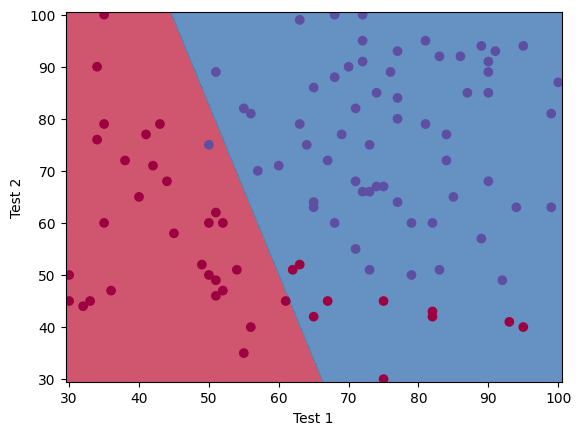

In [39]:
plot_decision_boundary(w, b, X_train, y_train)
# Set the y-axis label
plt.ylabel('Test 2') 
# Set the x-axis label
plt.xlabel('Test 1') 
plt.show()

<a name="2.8"></a>
### 1.8 Evaluating logistic regression

We can evaluate the quality of the parameters we have found by seeing how well the learned model predicts on our training set. 

We will implement the `predict` function below to do this.


<a name='ex-04'></a>
### Exercise 4

The `predict` function to produces `1` or `0` predictions given a dataset and a learned parameter vector $w$ and $b$.
- First we need to compute the prediction from the model $f(x^{(i)}) = g(w \cdot x^{(i)} + b)$ for every example 

- We interpret the output of the model ($f(x^{(i)})$) as the probability that $y^{(i)}=1$ given $x^{(i)}$ and parameterized by $w$.
- Therefore, to get a final prediction ($y^{(i)}=0$ or $y^{(i)}=1$) from the logistic regression model, we can use the following heuristic -

  if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$
  
  if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$

In [40]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    # Loop over each example
    for i in range(m):   
        
        # Calculate f_wb (exactly how you did it in the compute_cost function above)
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            
            # Add the corresponding term to z_wb
            z_wb_ij = X[i, j] * w[j]
            z_wb += z_wb_ij

        # Add bias term 
        z_wb += b

        # Calculate the prediction from the model
        f_wb = sigmoid(z_wb)
        

        # Apply the threshold
        if (f_wb >= .5):
            p[i] = 1
        
        else:
            p[i] = 0
            
    return p

Let's run the code below to report the training accuracy of your classifier function `predict` by computing the percentage of examples it got correct.

In [41]:
# Test for predict function
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

Output of predict: shape (4,), value [0. 1. 1. 1.]


Now let's use this to compute the accuracy on the training set

In [42]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %.2f'%(np.mean(p == y_train) * 100))

Train Accuracy: 89.00
